# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Read data

In [3]:
df=pd.read_csv('world_development_data_imputed.csv')

In [4]:
df

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,54224.0,301.244444,0.721838,1.153475e+08,1.354079,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2021.0,Morocco,Africa,Northern Africa,446550.0,37076584.0,83.075474,1.051484,1.428666e+11,7.929668,...,1.364081e+11,42.020038,26.080984,3.244246,74.042000,65.709558,137.459274,18.0,-46242.0,1.886932
4440,2021.0,Montenegro,Europe,Southern Europe,13810.0,619211.0,46.037993,-0.337763,5.861431e+09,13.043464,...,5.800493e+09,62.195638,14.835495,4.726248,73.824390,59.217626,178.395786,2.3,-101.0,0.161803
4441,2021.0,Mongolia,Asia,Eastern Asia,1564116.0,3347782.0,2.149449,1.609371,1.528644e+10,1.636770,...,1.247452e+10,60.549214,37.075572,14.420065,70.975000,105.237048,140.012223,14.7,0.0,1.795620
4442,2021.0,Kenya,Africa,Sub-Saharan Africa,580370.0,53005614.0,93.132821,1.942761,1.097037e+11,7.590489,...,1.100273e+11,19.915101,17.152436,4.330748,61.427000,23.971853,122.790239,37.2,-52549.0,3.706017


In [5]:
df.head()

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,54224.0,301.244444,0.721838,1.153475e+08,1.354079,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860


In [6]:
df.tail()

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
4439,2021.0,Morocco,Africa,Northern Africa,446550.0,37076584.0,83.075474,1.051484,1.428666e+11,7.929668,...,1.364081e+11,42.020038,26.080984,3.244246,74.04200,65.709558,137.459274,18.0,-46242.0,1.886932
4440,2021.0,Montenegro,Europe,Southern Europe,13810.0,619211.0,46.037993,-0.337763,5.861431e+09,13.043464,...,5.800493e+09,62.195638,14.835495,4.726248,73.82439,59.217626,178.395786,2.3,-101.0,0.161803
4441,2021.0,Mongolia,Asia,Eastern Asia,1564116.0,3347782.0,2.149449,1.609371,1.528644e+10,1.636770,...,1.247452e+10,60.549214,37.075572,14.420065,70.97500,105.237048,140.012223,14.7,0.0,1.795620
4442,2021.0,Kenya,Africa,Sub-Saharan Africa,580370.0,53005614.0,93.132821,1.942761,1.097037e+11,7.590489,...,1.100273e+11,19.915101,17.152436,4.330748,61.42700,23.971853,122.790239,37.2,-52549.0,3.706017
4443,2021.0,Zimbabwe,Africa,Sub-Saharan Africa,390760.0,15993524.0,41.342960,2.045715,2.837124e+10,8.468017,...,2.439325e+10,30.901234,28.805586,113.294981,59.25300,47.826604,89.146019,49.5,-25005.0,2.234724


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4444 non-null   float64
 1   Country          4444 non-null   object 
 2   Region           4444 non-null   object 
 3   SubRegion        4444 non-null   object 
 4   SurfAreaSqKm     4444 non-null   float64
 5   PopTotal         4444 non-null   float64
 6   PopDens          4444 non-null   float64
 7   PopGrowth%       4444 non-null   float64
 8   GDP              4444 non-null   float64
 9   GDPGrowth%       4444 non-null   float64
 10  AdolFertRate     4444 non-null   float64
 11  AgriValAdd%GDP   4444 non-null   float64
 12  Exports%GDP      4444 non-null   float64
 13  FertRate         4444 non-null   float64
 14  FDINetBoP        4444 non-null   float64
 15  GNI/CapAtlas     4444 non-null   float64
 16  GNIAtlas         4444 non-null   float64
 17  Imports%GDP   

In [8]:
df.columns

Index(['Year', 'Country', 'Region', 'SubRegion', 'SurfAreaSqKm', 'PopTotal',
       'PopDens', 'PopGrowth%', 'GDP', 'GDPGrowth%', 'AdolFertRate',
       'AgriValAdd%GDP', 'Exports%GDP', 'FertRate', 'FDINetBoP',
       'GNI/CapAtlas', 'GNIAtlas', 'Imports%GDP', 'IndValAdd%GDP',
       'InflConsPric%', 'LifeExpBirth', 'MerchTrade%GDP', 'MobileSubs/100',
       'MortRateU5', 'NetMigr', 'UrbanPopGrowth%'],
      dtype='object')

In [9]:
columns_to_drop = ['PopTotal', 'PopDens', 'PopGrowth%', 'UrbanPopGrowth%']
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df

,Year,Country,Region,SubRegion,SurfAreaSqKm,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,...,GNI/CapAtlas,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,1.801248e+10,-5.206288,152.572,33.096776,13.315247,...,916.923281,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0
1,2000.0,Malta,Europe,Southern Europe,320.0,4.323339e+09,19.681791,19.869,1.871997,120.247484,...,10950.000000,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0
2,2000.0,Belgium,Europe,Western Europe,30530.0,2.367925e+11,3.716679,11.915,1.176005,72.547395,...,25890.000000,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,1.153475e+08,1.354079,99.344,8.014391,28.696331,...,2770.000000,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,1.779521e+09,-3.918026,92.364,24.828745,25.517116,...,710.000000,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2021.0,Morocco,Africa,Northern Africa,446550.0,1.428666e+11,7.929668,25.936,12.035862,32.931642,...,3620.000000,1.364081e+11,42.020038,26.080984,3.244246,74.042000,65.709558,137.459274,18.0,-46242.0
4440,2021.0,Montenegro,Europe,Southern Europe,13810.0,5.861431e+09,13.043464,10.361,6.461483,42.834355,...,9370.000000,5.800493e+09,62.195638,14.835495,4.726248,73.824390,59.217626,178.395786,2.3,-101.0
4441,2021.0,Mongolia,Asia,Eastern Asia,1564116.0,1.528644e+10,1.636770,26.708,13.163174,58.548864,...,3730.000000,1.247452e+10,60.549214,37.075572,14.420065,70.975000,105.237048,140.012223,14.7,0.0
4442,2021.0,Kenya,Africa,Sub-Saharan Africa,580370.0,1.097037e+11,7.590489,64.185,21.477075,10.774181,...,2080.000000,1.100273e+11,19.915101,17.152436,4.330748,61.427000,23.971853,122.790239,37.2,-52549.0


In [11]:
df.shape

(4444, 22)

In [12]:
df.isnull().sum()

Year              0
Country           0
Region            0
SubRegion         0
SurfAreaSqKm      0
GDP               0
GDPGrowth%        0
AdolFertRate      0
AgriValAdd%GDP    0
Exports%GDP       0
FertRate          0
FDINetBoP         0
GNI/CapAtlas      0
GNIAtlas          0
Imports%GDP       0
IndValAdd%GDP     0
InflConsPric%     0
LifeExpBirth      0
MerchTrade%GDP    0
MobileSubs/100    0
MortRateU5        0
NetMigr           0
dtype: int64

In [13]:
df.describe()

,Year,SurfAreaSqKm,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,GNI/CapAtlas,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr
count,4444.000000,4.444000e+03,4.444000e+03,4444.000000,4444.000000,4444.000000,4444.000000,4444.000000,4.444000e+03,4444.000000,4.444000e+03,4444.000000,4444.000000,4444.000000,4444.000000,4444.000000,4444.000000,4444.000000,4.444000e+03
mean,2010.500000,6.640703e+05,3.194480e+11,3.268364,53.469415,10.962849,44.263785,2.886696,8.949895e+09,12344.300408,3.166865e+11,50.468908,25.721662,7.500906,70.230413,64.729675,77.088754,37.743370,2.013533e+02
std,6.345003,1.888320e+06,1.411696e+12,5.749729,43.480988,11.195331,29.124115,1.499746,3.651113e+10,18030.552992,1.417688e+12,27.432700,12.395006,43.558717,8.773385,41.686167,50.754239,39.387756,1.764569e+05
min,2000.000000,2.000000e+01,1.396473e+07,-54.235900,1.493000,0.012519,2.249870,0.772000,-3.303385e+11,110.000000,2.535845e+07,1.877678,2.758632,-30.199654,41.957000,7.805932,0.000000,2.000000,-2.290411e+06
25%,2005.000000,1.782000e+04,4.558559e+09,1.099784,17.225750,2.088816,24.622995,1.710000,8.813284e+07,1410.000000,4.199838e+09,30.200552,17.387792,1.442125,64.433500,40.191608,32.957354,9.200000,-2.015975e+04
50%,2010.500000,1.113700e+05,1.977252e+10,3.494868,41.599000,6.979923,38.530971,2.381500,6.421151e+08,4410.000000,1.843209e+10,44.884701,23.565796,3.713096,72.027415,55.318351,80.917939,23.100000,-9.945000e+02
75%,2016.000000,5.053700e+05,1.288408e+11,5.857273,77.742000,17.192146,60.796237,3.807250,4.009787e+09,14762.500000,1.246401e+11,66.561876,30.813010,7.945621,76.809049,77.437441,114.777618,52.200000,1.032225e+04
max,2021.000000,1.709825e+07,2.331508e+13,86.826748,205.385000,79.042362,228.993771,7.732000,7.338265e+11,122130.000000,2.353992e+13,221.009959,86.669555,2630.122674,85.497561,420.661372,420.853098,228.500000,1.479676e+06


# Data Visualation

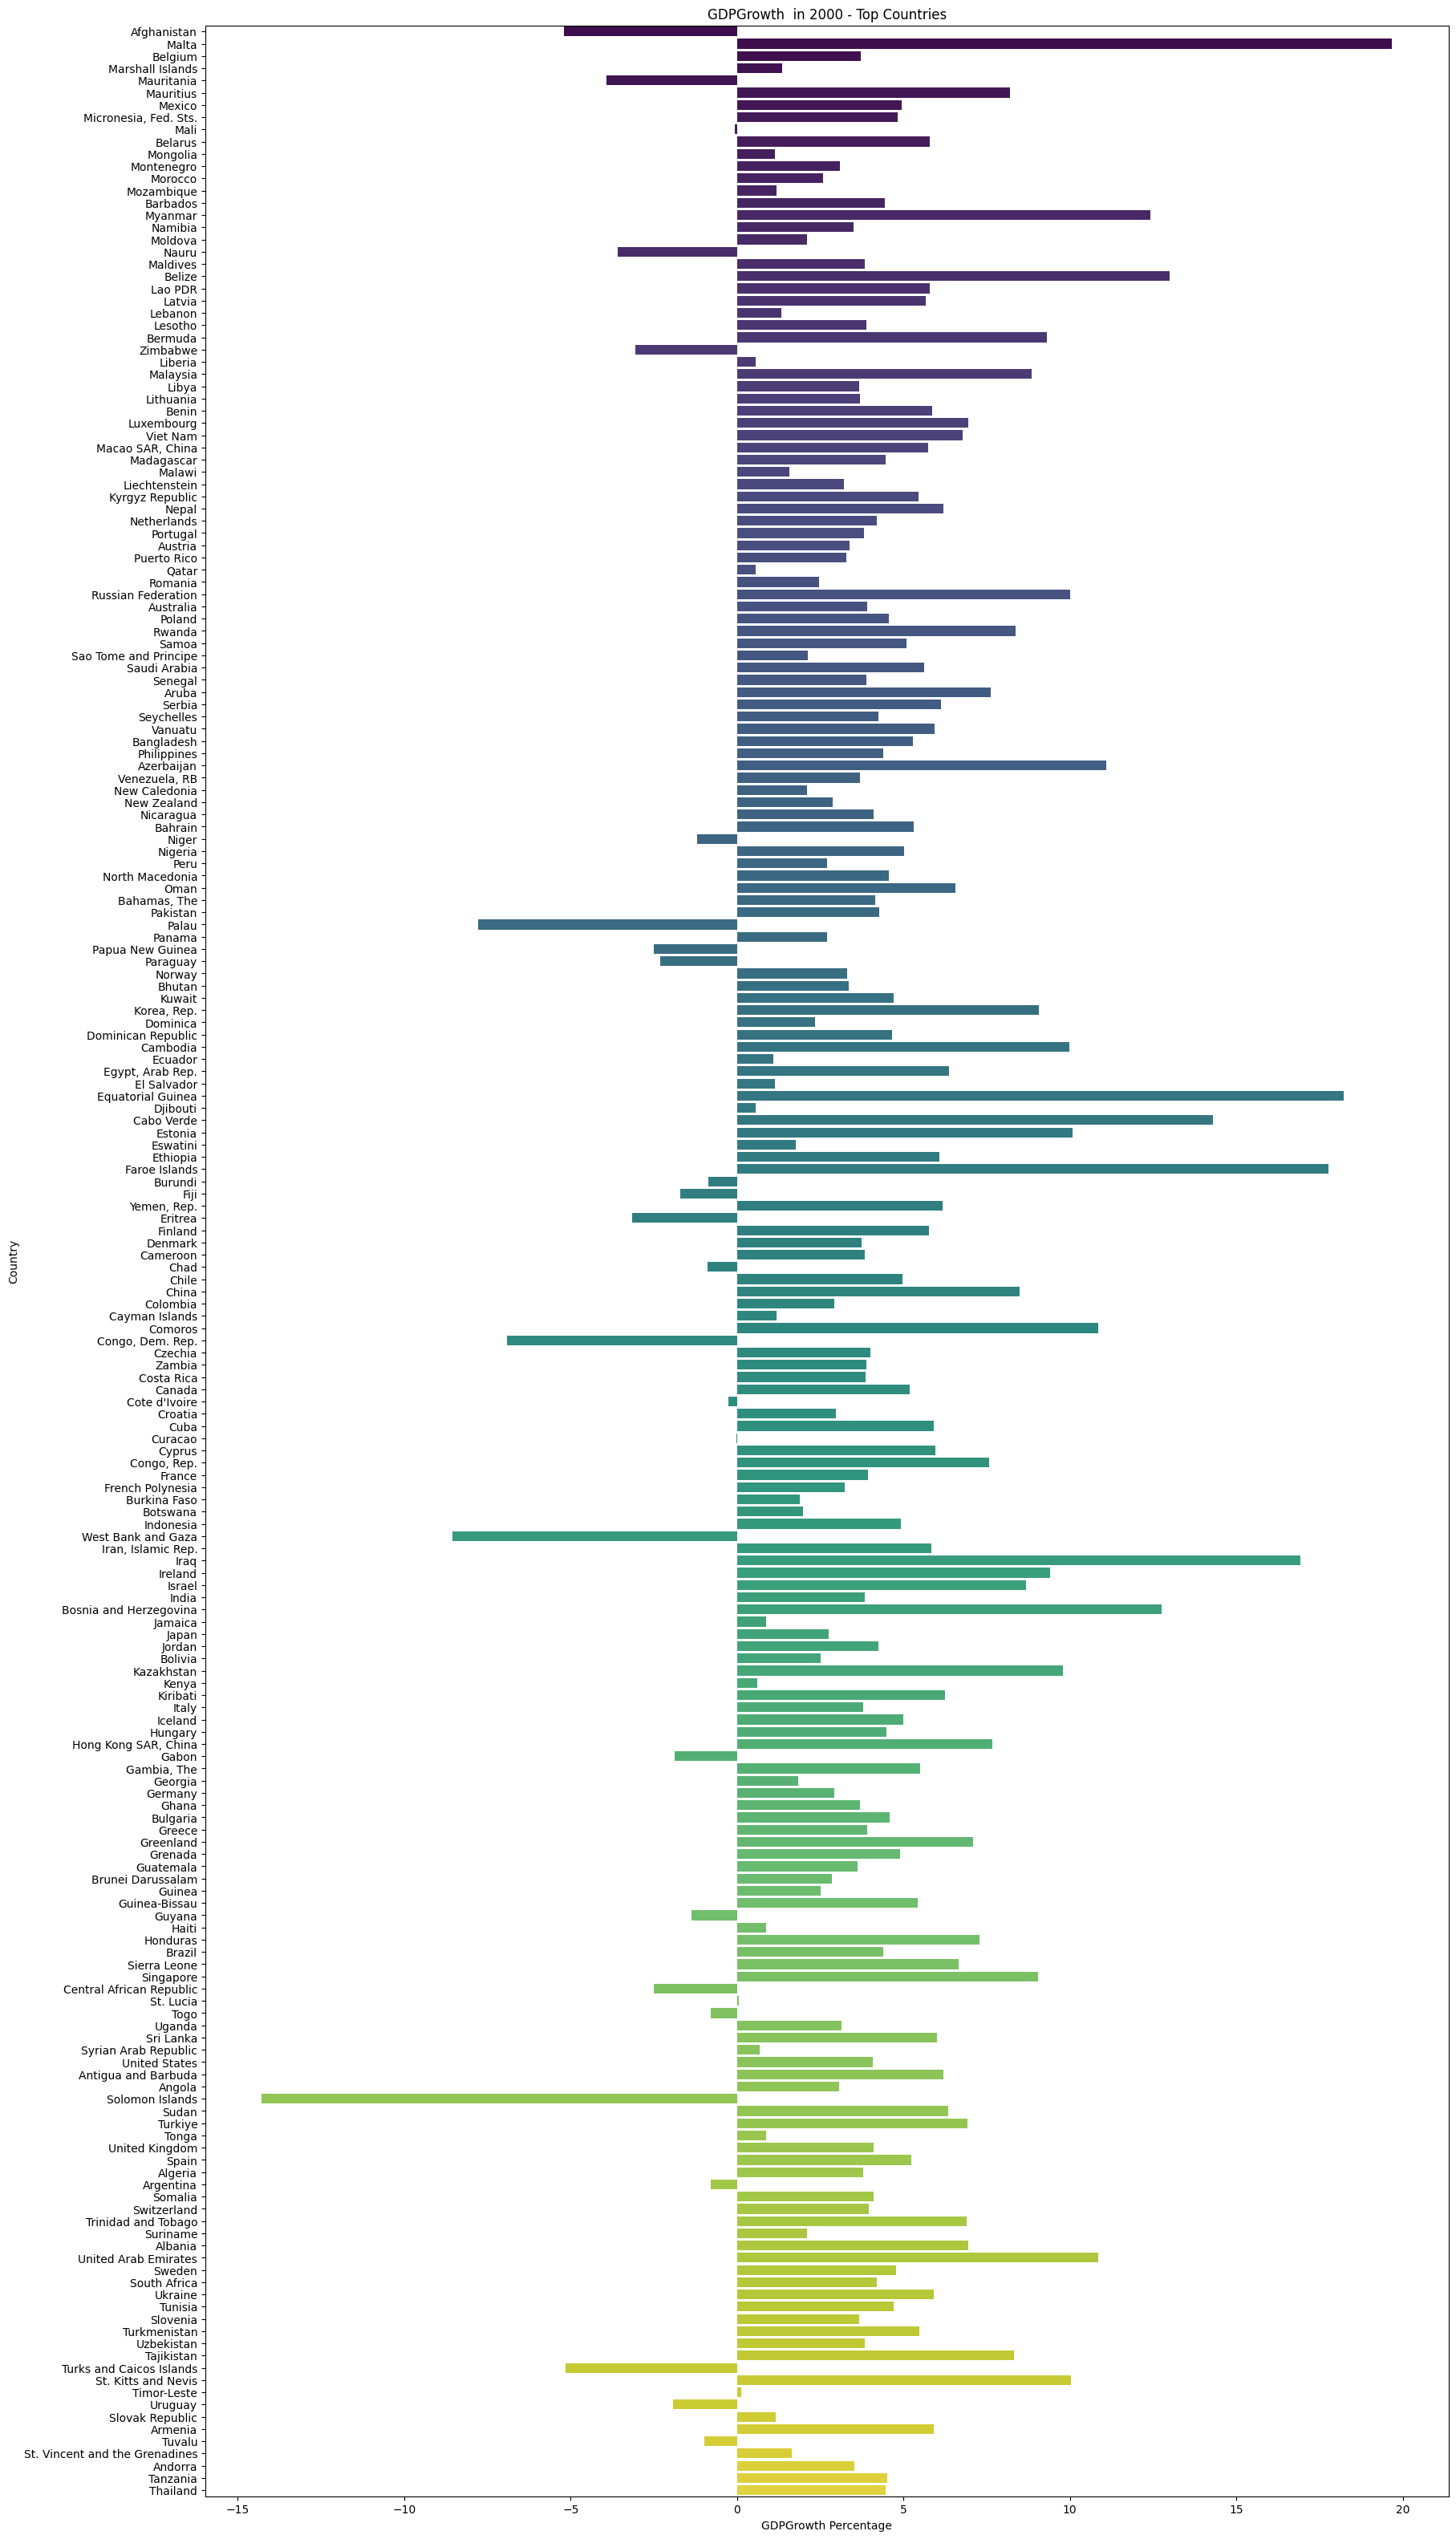

In [21]:
df_2000 = df[df['Year'] == 2000]
# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

# Create a bar chart using Seaborn
sns.barplot(x='GDPGrowth%', y='Country', data=df_2000,palette='viridis')

# Customize the plot
plt.xlabel('GDPGrowth Percentage')
plt.ylabel('Country')
plt.title('GDPGrowth  in 2000 - Top Countries')
plt.show()

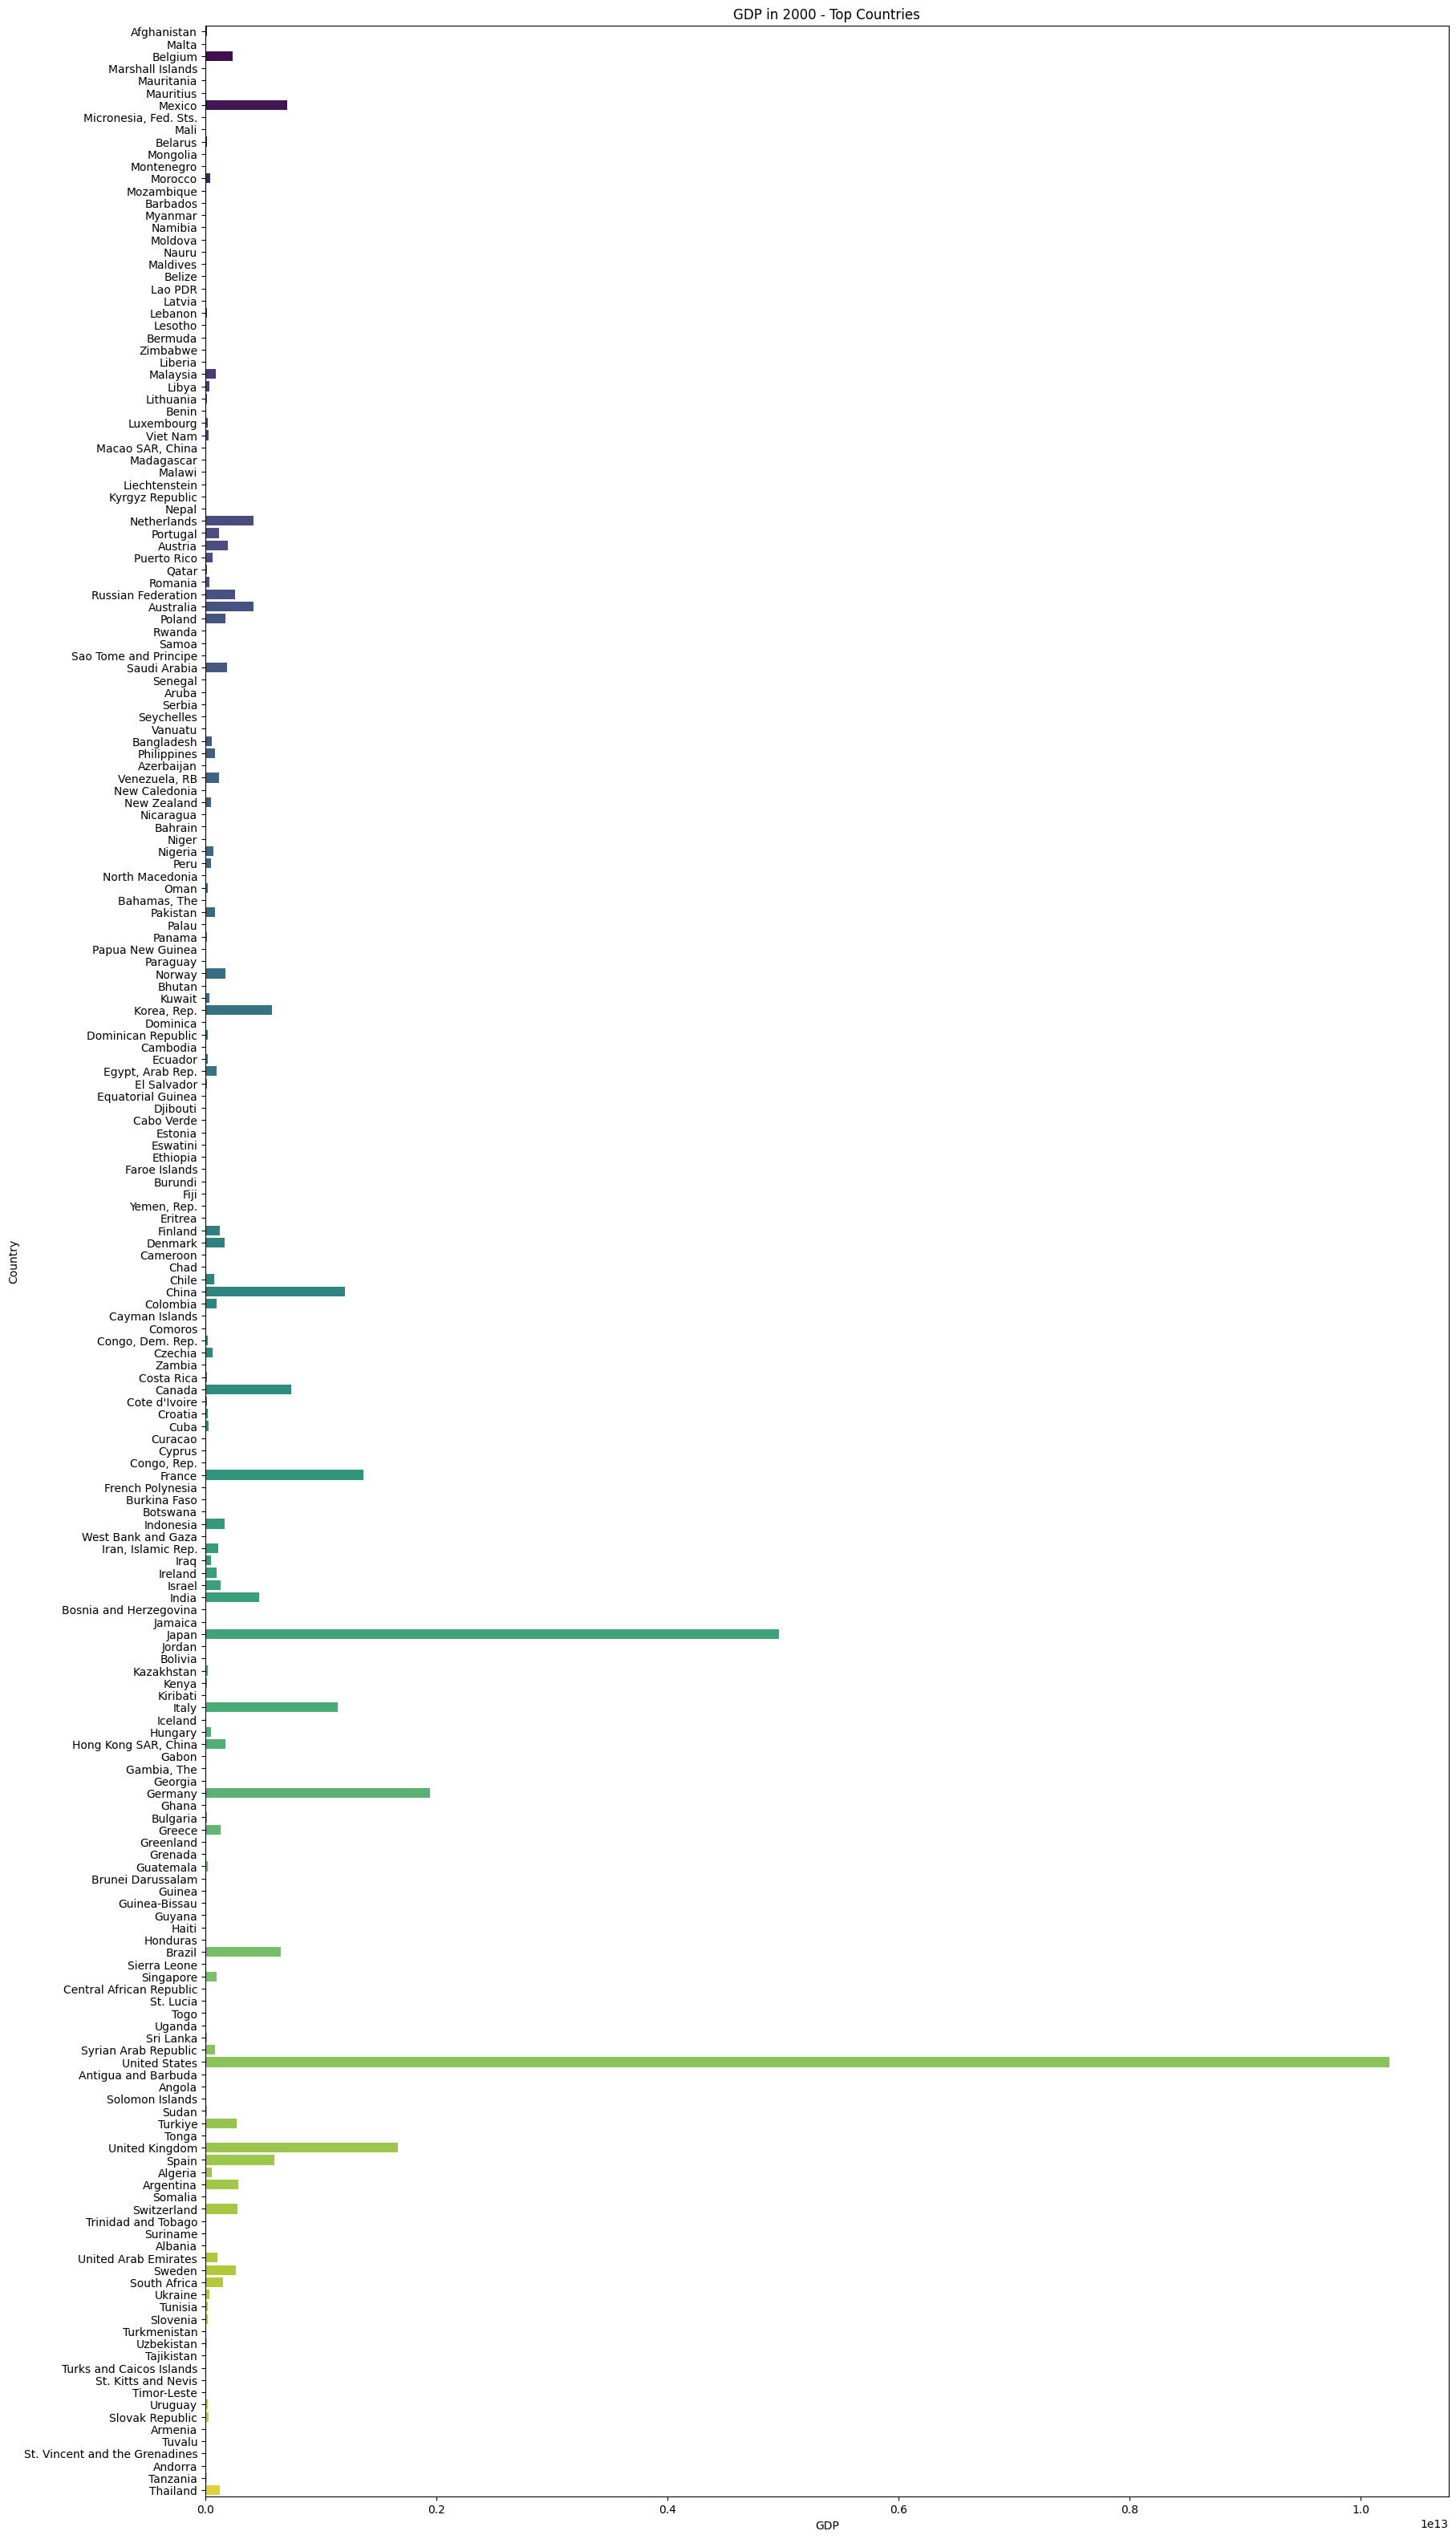

In [15]:
df_2000 = df[df['Year'] == 2000]

# Sort the data by population density


# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

# Create a bar chart using Seaborn
sns.barplot(x='GDP', y='Country', data=df_2000, palette='viridis')

# Customize the plot
plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('GDP in 2000 - Top Countries')
plt.show()

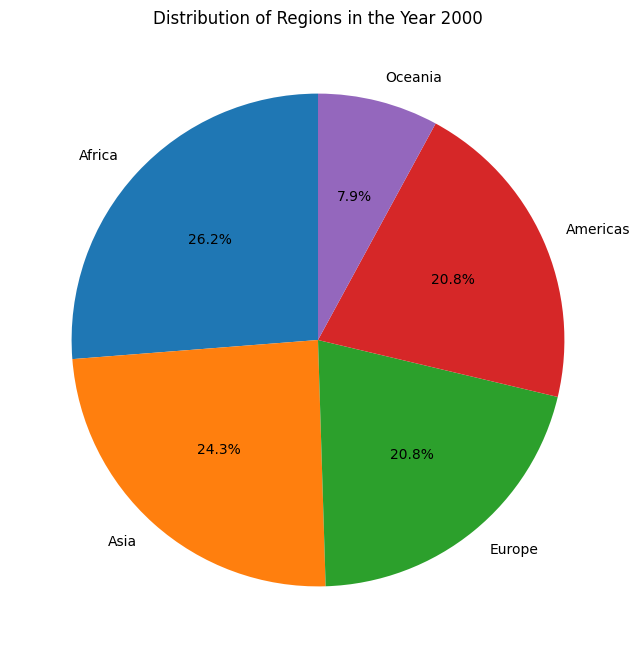

In [16]:
region_distribution = df['Region'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Regions in the Year 2000')
plt.show()

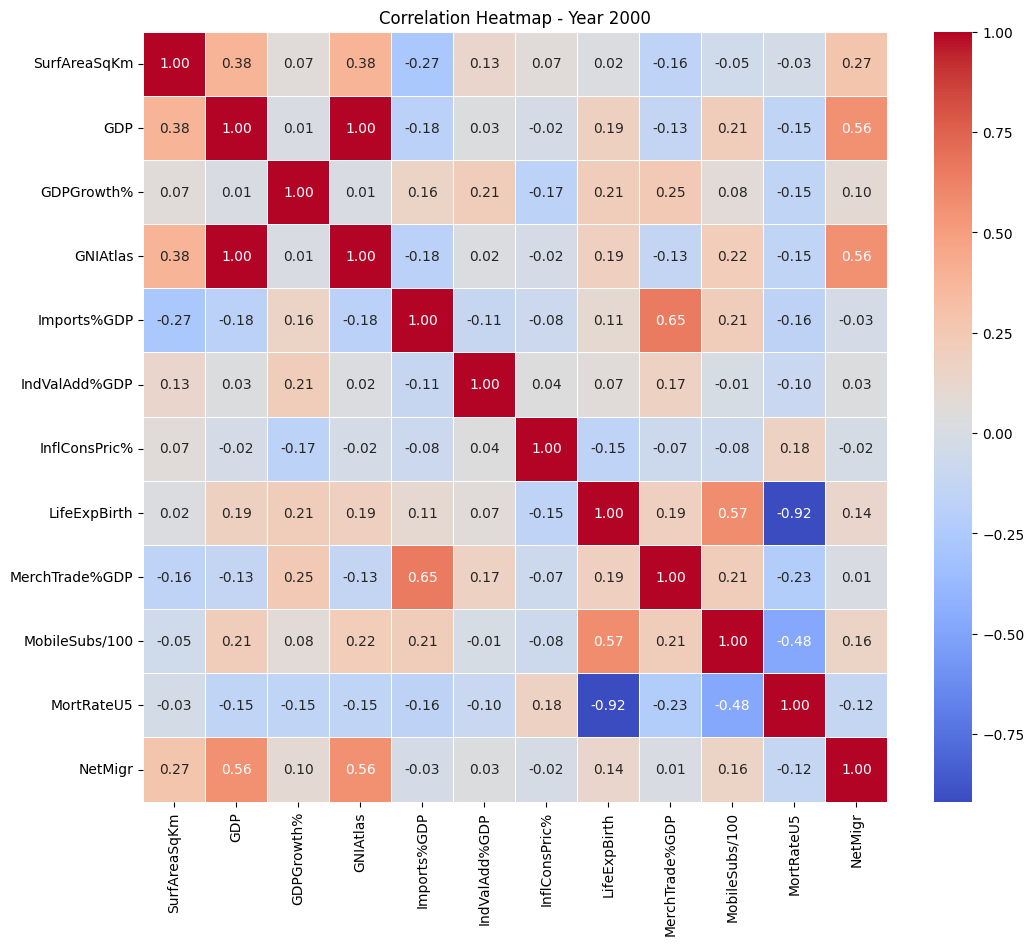

In [17]:
df_2000 = df[df['Year'] == 2000]

# Select relevant numerical columns for correlation analysis
numerical_columns = ['SurfAreaSqKm',  'GDP', 'GDPGrowth%', 'GNIAtlas', 
                     'Imports%GDP', 'IndValAdd%GDP', 'InflConsPric%', 'LifeExpBirth', 'MerchTrade%GDP', 
                     'MobileSubs/100', 'MortRateU5', 'NetMigr']

# Calculate the correlation matrix
correlation_matrix = df_2000[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap - Year 2000')
plt.show()

# Using Machine learning Algorithms

Actual R-squared: 1.0
Predicted R-squared: 0.9986254061387554


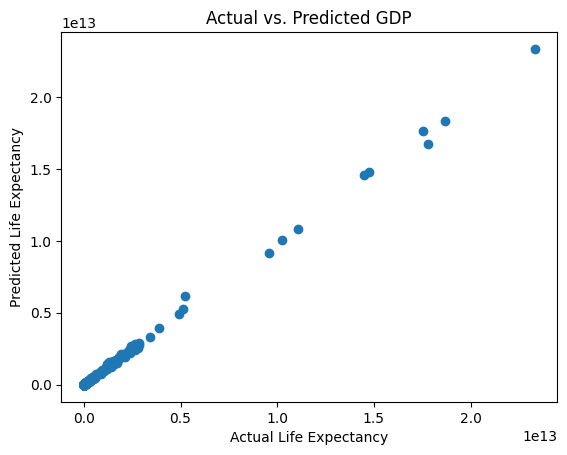

In [18]:

# Selecting features and target variable
features = ['SurfAreaSqKm', 'LifeExpBirth', 'GDPGrowth%', 'AdolFertRate', 'AgriValAdd%GDP', 'Exports%GDP', 'GNIAtlas', 'Imports%GDP', 'IndValAdd%GDP', 'InflConsPric%', 'MerchTrade%GDP', 'MobileSubs/100', 'MortRateU5', 'NetMigr']
target = 'GDP'

# Dropping rows with missing values for simplicity
df_ml = df.dropna(subset=features + [target])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml[target], test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating R-squared for actual and predicted values
r2_actual = r2_score(y_test, y_test)  # Should be 1.0 for actual values
r2_predicted = r2_score(y_test, predictions)

print(f'Actual R-squared: {r2_actual}')
print(f'Predicted R-squared: {r2_predicted}')

# Plotting predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted GDP')
plt.show()


Mean Squared Error: 2.0751175291441133e+22
R-squared: 0.9924467391346813


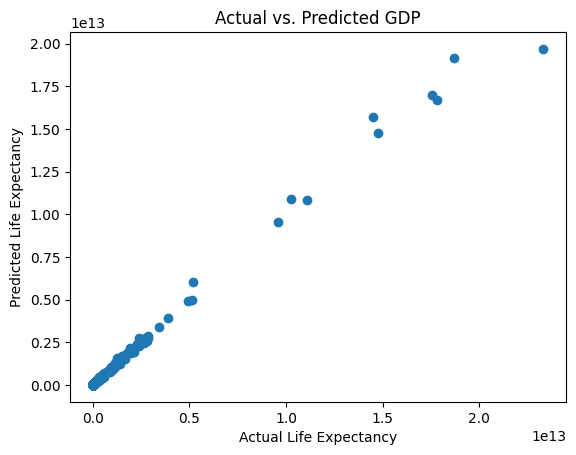

In [19]:
# Assuming your data is in a DataFrame named 'df'
# If not, you can create it using pd.DataFrame(your_data)

# Selecting features and target variable
features = ['SurfAreaSqKm', 'LifeExpBirth', 'GDPGrowth%', 'AdolFertRate', 'AgriValAdd%GDP', 'Exports%GDP', 'GNIAtlas', 'Imports%GDP', 'IndValAdd%GDP', 'InflConsPric%', 'MerchTrade%GDP', 'MobileSubs/100', 'MortRateU5', 'NetMigr']
target = 'GDP'

# Dropping rows with missing values for simplicity
df_ml = df.dropna(subset=features + [target])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml[target], test_size=0.2, random_state=42)

# Creating and training the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted GDP')
plt.show()
